In [21]:
import joblib
import pandas as pd
import numpy as np

df = pd.read_csv('clean_cicids.csv')

xgb = joblib.load('models/xgboost_cicids_model.pkl')
scaler = joblib.load('models/scaler.pkl')

X = df.drop('Label', axis=1)
y = df['Label']

X.replace([np.inf, -np.inf], np.nan, inplace=True)  # convert inf to nan
X.dropna(inplace=True)  # drop rows with nan values

# Align y with X
y = y.loc[X.index]

X_scaled = scaler.transform(X.values)

preds = xgb.predict(X_scaled)

print(preds)


# Check results
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y, preds))
print(confusion_matrix(y, preds))
print(classification_report(y, preds))


[0 0 0 ... 0 0 0]
0.999986708667278
[[ 97684      2]
 [     1 128024]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97686
           1       1.00      1.00      1.00    128025

    accuracy                           1.00    225711
   macro avg       1.00      1.00      1.00    225711
weighted avg       1.00      1.00      1.00    225711



In [9]:
!pip install shap

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------- -------------- 1.8/2.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -- ------------------------------------- 2.1/30.3 MB 10.7 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/30.3 MB 10.5 MB/s eta 0:00:03
   -------- ------------------------------- 6.3/30.3 MB 10.2 MB/s eta 0:00:03
   ----------- ---------------------------- 8.7/30.3 MB 10.5 MB/s eta 0:00:03
   ------------- -------------------------- 10.2/30.3 MB 10.1 MB/s eta 0:00:02
   ---------------- ----------------------- 12.6/30.3 MB 10.2 MB/s eta 0:00:02
   ------------------- -------------------- 14.9/30.3 MB 10.4 MB/s eta 0:00:02
   ----------------------- ---------------- 17.6/30.3 MB 10.5 MB/s eta 0:00:02
   -------------------------- ------------- 19.9/30.3 MB 10.7 MB/s eta 0:00:01
 

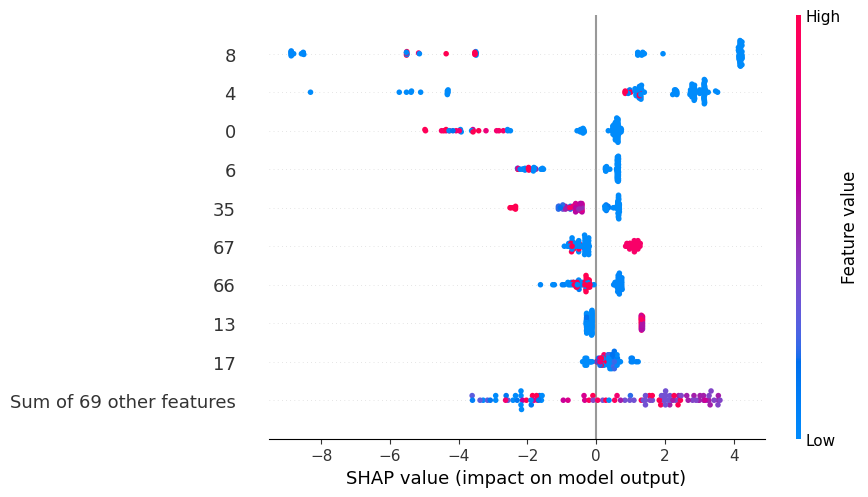

In [3]:
"""SHAP"""

import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(xgb)
#explainer = shap.Explainer(xgb, X_scaled)


#As shap takes a lot of time on large dataset
#so we select a small sample for speed
X_sample = pd.DataFrame(X_scaled).sample(100)

shap_values = explainer(X_sample)

shap.plots.beeswarm(shap_values)

In [4]:
shap.plots.force(explainer.expected_value, shap_values[0].values, X.iloc[0])


AttributeError: 'int' object has no attribute 'split'

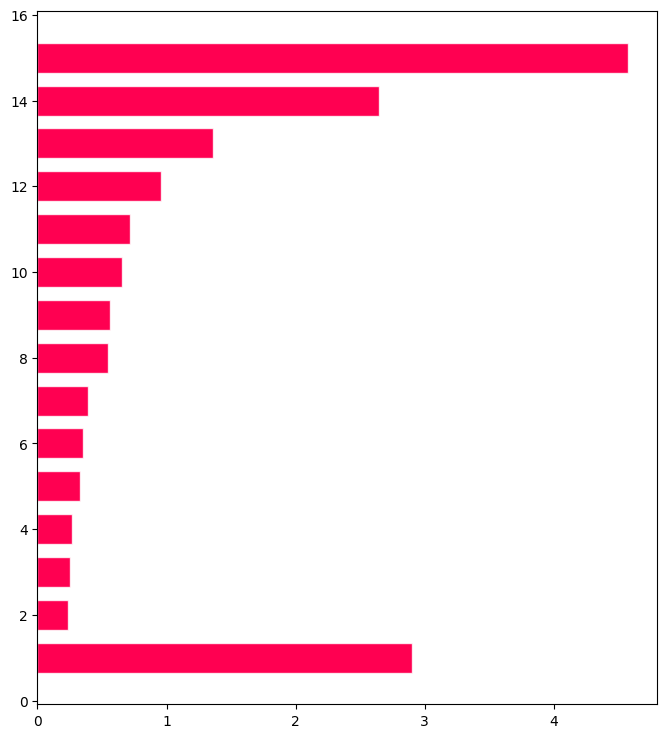

In [6]:
shap.plots.bar(shap_values, max_display=15)


TypeError: can only concatenate str (not "int") to str

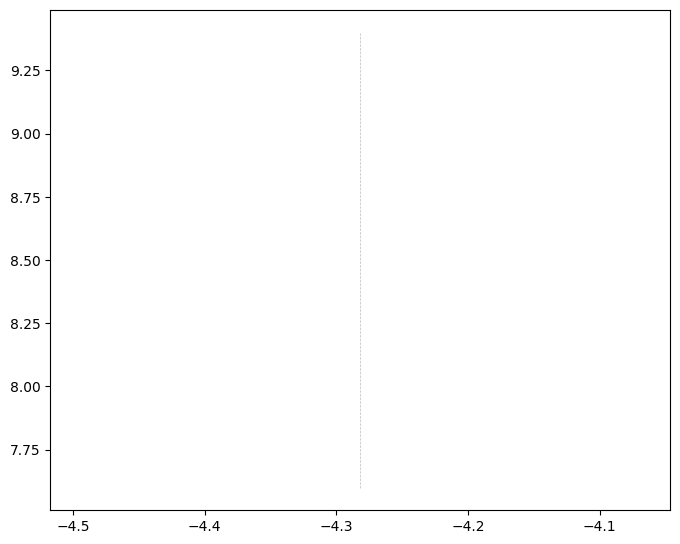

In [7]:
shap.plots.waterfall(shap_values[0])


In [4]:
"""Real Time Simulation"""
import time
import os

print("Real-Time Intrusion Detection System Activated... ⚡")


#We assume that we are reading data every few seconds
while True:

    new_data = X.sample(1) #random row

    new_scaled = scaler.transform(new_data)
    pred = xgb.predict(new_scaled)

    if pred[0] == 1:
         print(f"ALERT: 🚨 Attack detected at {time.ctime()} | Data: {new_data.values}")
         with open("alerts_log.txt", "a") as f:
            f.write(f"ATTACK at {time.ctime()} | {new_data.values}\n")

    else:
         print(f"SAFE ✅ : Normal Traffic at {time.ctime()}")

    time.sleep(5) 
        

Real-Time Intrusion Detection System Activated... ⚡
ALERT: 🚨 Attack detected at Thu Apr 10 00:57:15 2025 | Data: [[8.00000000e+01 4.78058000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 2.43338674e+04 1.46425747e+01
  7.96763333e+04 1.94017547e+05 4.75712000e+05 4.50000000e+01
  1.82900000e+03 9.14500000e+02 5.42350901e+02 1.29800000e+03
  5.31000000e+02 4.78013000e+05 1.59337667e+05 2.73989168e+05
  4.75712000e+05 4.26000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  6.27538918e+00 8.36718557e+00 0.00000000e+00 1.15950000e+04
  1.45412500e+03 4.09753753e+03 1.68000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66185714e+03 8.66666667e+00 2.90175000e+03 7.20000000e+01
  0.00000000e+00 0.

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:20 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:25 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:30 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:57:35 2025 | Data: [[8.00000000e+01 1.01976411e+08 9.00000000e+00 5.00000000e+00
  6.20000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  6.88888889e+00 5.30199124e+00 7.21500000e+03 0.00000000e+00
  2.32140000e+03 3.32776979e+03 1.14428424e+02 1.37286652e-01
  7.84433931e+06 2.53000000e+07 9.15000000e+07 3.00000000e+00
  1.02000000e+08 1.27000000e+07 3.20000000e+07 9.15000000e+07
  1.03000000e+02 2.35531000e+05 5.88827500e+04 1.17141374e+05
  2.34594000e+05 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.92000000e+02 1.12000000e+02
  8.82557050e-02 4.90309470e-02 0.00000000e+00 7.21500000e+03
  7.78333333e+02 2.10703487e+03 4.43959595e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.33928571e+02 6.88888889e+00 2.32140000e+03 1.92000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:40 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:45 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:57:50 2025 | Data: [[8.00000000e+01 1.61000400e+06 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32140000e+03 3.17337388e+03 7.22544789e+03 4.96893175e+00
  2.30000571e+05 6.08063125e+05 1.60895800e+06 4.00000000e+00
  8.55000000e+02 4.27500000e+02 5.36694047e+02 8.07000000e+02
  4.80000000e+01 1.60993500e+06 4.02483750e+05 8.04316246e+05
  1.60895800e+06 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.86334941e+00 3.10558235e+00 0.00000000e+00 5.84000000e+03
  1.29255556e+03 2.55415921e+03 6.52372928e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:57:55 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:00 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:58:05 2025 | Data: [[8.00000000e+01 8.29882000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.40104256e+04 8.43493412e+00
  1.38313667e+05 3.32923699e+05 8.17831000e+05 1.38000000e+02
  1.17270000e+04 5.86350000e+03 8.07728076e+03 1.15750000e+04
  1.52000000e+02 8.29588000e+05 2.76529333e+05 4.68815556e+05
  8.17831000e+05 1.86000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  3.61497177e+00 4.81996236e+00 0.00000000e+00 8.76000000e+03
  1.45337500e+03 3.11395261e+03 9.69670084e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:10 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:58:15 2025 | Data: [[8.00000000e+01 9.94280000e+04 3.00000000e+00 7.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 2.92000000e+03 0.00000000e+00
  1.65728571e+03 1.29917214e+03 1.16938890e+05 1.00575291e+02
  1.10475556e+04 2.69956787e+04 8.14940000e+04 5.00000000e+00
  1.70110000e+04 8.50550000e+03 1.20215224e+04 1.70060000e+04
  5.00000000e+00 9.93640000e+04 1.65606667e+04 3.25410182e+04
  8.14940000e+04 1.20000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.52000000e+02
  3.01725872e+01 7.04027035e+01 0.00000000e+00 2.92000000e+03
  1.05700000e+03 1.30629086e+03 1.70639580e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.16270000e+03 8.66666667e+00 1.65728571e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:20 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:25 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:30 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:35 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:40 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:45 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:58:50 2025 | Data: [[8.00000000e+01 1.74918500e+06 2.00000000e+00 6.00000000e+00
  2.00000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  1.00000000e+01 1.41421356e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 6.64709565e+03 4.57355854e+00
  2.49883571e+05 6.60535013e+05 1.74783600e+06 3.00000000e+00
  1.00500000e+03 1.00500000e+03 0.00000000e+00 1.00500000e+03
  1.00500000e+03 1.74910900e+06 3.49821800e+05 7.81513795e+05
  1.74783600e+06 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.20000000e+01 1.32000000e+02
  1.14338964e+00 3.43016891e+00 0.00000000e+00 5.84000000e+03
  1.29188889e+03 2.22665402e+03 4.95798811e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.00000000e+00
  1.45337500e+03 1.00000000e+01 1.93450000e+03 5.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:58:55 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:00 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:05 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:59:10 2025 | Data: [[8.00000000e+01 1.45103000e+05 3.00000000e+00 7.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.65814286e+03 2.13729708e+03 8.01706374e+04 6.89165627e+01
  1.61225556e+04 4.80800116e+04 1.44335000e+05 3.00000000e+00
  5.93000000e+02 2.96500000e+02 4.15071681e+02 5.90000000e+02
  3.00000000e+00 1.45087000e+05 2.41811667e+04 5.88636293e+04
  1.44335000e+05 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.52000000e+02
  2.06749688e+01 4.82415939e+01 0.00000000e+00 5.84000000e+03
  1.05754545e+03 1.85343753e+03 3.43523067e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.16330000e+03 8.66666667e+00 1.65814286e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:59:15 2025 | Data: [[8.00000000e+01 8.08044500e+06 7.00000000e+00 5.00000000e+00
  5.00000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.14285714e+00 6.09449400e+00 8.76000000e+03 0.00000000e+00
  2.32020000e+03 3.66889700e+03 1.44187604e+03 1.48506673e+00
  7.34585909e+05 1.89492640e+06 6.20694600e+06 1.00000000e+00
  8.04179100e+06 1.34029850e+06 2.49252436e+06 6.20694600e+06
  1.00000000e+00 5.06190000e+04 1.26547500e+04 1.78779458e+04
  3.81300000e+04 1.91000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.52000000e+02 1.12000000e+02
  8.66288923e-01 6.18777802e-01 0.00000000e+00 8.76000000e+03
  8.96692308e+02 2.42053256e+03 5.85897790e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.71416667e+02 7.14285714e+00 2.32020000e+03 1.52000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:20 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:59:25 2025 | Data: [[ 8.00000000e+01  4.09300700e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.32957456e+00  1.22159576e+00
   1.02325175e+06  2.04547487e+06  4.09146400e+06  2.19000000e+02
   4.09300700e+06  1.02325175e+06  2.04547487e+06  4.09146400e+06
   2.19000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   1.22159576e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:31 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:36 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:41 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:59:46 2025 | Data: [[8.00000000e+01 9.15376940e+07 8.00000000e+00 4.00000000e+00
  5.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 1.27411993e+02 1.31093536e-01
  8.32160854e+06 2.57000000e+07 8.58000000e+07 2.00000000e+00
  8.99000000e+07 1.28000000e+07 3.22000000e+07 8.58000000e+07
  1.63000000e+02 1.65453900e+06 5.51513000e+05 9.54480473e+05
  1.65365200e+06 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 9.20000000e+01
  8.73956910e-02 4.36978450e-02 0.00000000e+00 1.15950000e+04
  8.97615385e+02 3.21416753e+03 1.03000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.72416667e+02 7.00000000e+00 2.90175000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 00:59:51 2025 | Data: [[8.00000000e+01 1.07658000e+06 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.75500000e+03 0.00000000e+00
  1.93450000e+03 2.52912457e+03 1.08055138e+04 8.35980605e+00
  1.34572500e+05 3.80162706e+05 1.07542700e+06 3.00000000e+00
  8.75000000e+02 4.37500000e+02 4.57498087e+02 7.61000000e+02
  1.14000000e+02 1.07656500e+06 2.15313000e+05 4.80818482e+05
  1.07542700e+06 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  2.78660202e+00 5.57320403e+00 0.00000000e+00 5.75500000e+03
  1.16330000e+03 2.13187096e+03 4.54487379e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 00:59:56 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:01 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:06 2025 | Data: [[8.00000000e+01 1.07580700e+06 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32140000e+03 3.17337388e+03 1.08132779e+04 7.43627807e+00
  1.53686714e+05 4.06086857e+05 1.07460500e+06 2.00000000e+00
  9.52000000e+02 4.76000000e+02 4.83661038e+02 8.18000000e+02
  1.34000000e+02 1.07568700e+06 2.68921750e+05 5.37122321e+05
  1.07460500e+06 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  2.78860428e+00 4.64767379e+00 0.00000000e+00 5.84000000e+03
  1.29255556e+03 2.55415921e+03 6.52372928e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:11 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:16 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:21 2025 | Data: [[8.00000000e+01 1.83002100e+06 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.21500000e+03 0.00000000e+00
  2.32140000e+03 3.32776979e+03 6.35675766e+03 4.37153453e+00
  2.61431571e+05 6.90528678e+05 1.82740300e+06 3.40000000e+01
  2.19000000e+03 1.09500000e+03 5.51543289e+02 1.48500000e+03
  7.05000000e+02 1.82998700e+06 4.57496750e+05 9.13271354e+05
  1.82740300e+06 1.60000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.63932545e+00 2.73220908e+00 0.00000000e+00 7.21500000e+03
  1.29255556e+03 2.65058565e+03 7.02560428e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:26 2025 | Data: [[8.00000000e+01 7.41508650e+07 9.00000000e+00 6.00000000e+00
  6.20000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  6.88888889e+00 5.30199124e+00 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 1.57368360e+02 2.02290290e-01
  5.29649036e+06 1.76000000e+07 6.59000000e+07 1.00000000e+00
  7.37000000e+07 9.21405225e+06 2.31000000e+07 6.59000000e+07
  1.00000000e+00 4.40351000e+05 8.80702000e+04 1.95353859e+05
  4.37527000e+05 4.70000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.92000000e+02 1.32000000e+02
  1.21374174e-01 8.09161160e-02 0.00000000e+00 5.84000000e+03
  7.29687500e+02 1.75434477e+03 3.07772556e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.78333333e+02 6.88888889e+00 1.93450000e+03 1.92000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:31 2025 | Data: [[8.00000000e+01 4.90029000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 2.37271672e+04 1.42848689e+01
  8.16715000e+04 1.94914164e+05 4.79452000e+05 1.80000000e+01
  1.03450000e+04 5.17250000e+03 7.18774043e+03 1.02550000e+04
  9.00000000e+01 4.90011000e+05 1.63337000e+05 2.73811130e+05
  4.79452000e+05 1.79000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  6.12208665e+00 8.16278220e+00 0.00000000e+00 8.76000000e+03
  1.45337500e+03 3.11395261e+03 9.69670084e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:36 2025 | Data: [[ 8.00000000e+01  3.11893000e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.61868333e+00  1.60311389e+00
   7.79732500e+05  1.55858904e+06  3.11761600e+06  4.00000000e+00
   3.11893000e+06  7.79732500e+05  1.55858904e+06  3.11761600e+06
   4.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   1.60311389e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:41 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:46 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:00:51 2025 | Data: [[8.00000000e+01 9.31991630e+07 8.00000000e+00 6.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 5.84000000e+03 0.00000000e+00
  1.93350000e+03 2.20107826e+03 1.25076231e+02 1.50215941e-01
  7.16916638e+06 2.56000000e+07 9.22000000e+07 1.00000000e+00
  9.32000000e+07 1.33000000e+07 3.48000000e+07 9.22000000e+07
  1.00000000e+00 4.53320000e+04 9.06640000e+03 1.47282064e+04
  3.40150000e+04 4.70000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 1.32000000e+02
  8.58376810e-02 6.43782610e-02 0.00000000e+00 5.84000000e+03
  7.77533333e+02 1.63852158e+03 2.68475298e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.33071429e+02 7.00000000e+00 1.93350000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:00:56 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:01 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:01:06 2025 | Data: [[8.00000000e+01 7.82150000e+04 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.48654350e+05 8.94968996e+01
  1.30358333e+04 2.95396475e+04 7.32430000e+04 8.80000000e+01
  4.69600000e+03 2.34800000e+03 2.94439264e+03 4.43000000e+03
  2.66000000e+02 7.80110000e+04 2.60036667e+04 4.09693590e+04
  7.32430000e+04 1.88000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  3.83558141e+01 5.11410855e+01 0.00000000e+00 8.76000000e+03
  1.45337500e+03 3.11395261e+03 9.69670084e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:11 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:16 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:01:21 2025 | Data: [[8.00000000e+01 8.73843000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.01350000e+04 0.00000000e+00
  2.32140000e+03 4.41320199e+03 1.33124600e+04 9.15496262e+00
  1.24834714e+05 3.28974007e+05 8.70875000e+05 3.00000000e+00
  2.53200000e+03 1.26600000e+03 1.78615173e+03 2.52900000e+03
  3.00000000e+00 8.73760000e+05 2.18440000e+05 4.34958073e+05
  8.70875000e+05 1.63000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  3.43311098e+00 5.72185164e+00 0.00000000e+00 1.01350000e+04
  1.29255556e+03 3.35063491e+03 1.12000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:26 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:31 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:36 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:01:41 2025 | Data: [[8.00000000e+01 8.92429000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 1.30352106e+04 1.00848359e+01
  1.11553625e+05 3.14330327e+05 8.89479000e+05 4.60000000e+01
  2.55100000e+03 1.27550000e+03 1.63836641e+03 2.43400000e+03
  1.17000000e+02 8.92363000e+05 1.78472600e+05 3.97466139e+05
  8.89479000e+05 4.60000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  3.36161196e+00 6.72322392e+00 0.00000000e+00 5.84000000e+03
  1.16330000e+03 2.13832915e+03 4.57245157e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:46 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:01:51 2025 | Data: [[ 8.00000000e+01  9.96873900e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.00940771e+00  5.01567952e-01
   2.49218475e+06  4.98370952e+06  9.96774900e+06  2.00000000e+00
   9.96873900e+06  2.49218475e+06  4.98370952e+06  9.96774900e+06
   2.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   5.01567952e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:01:56 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:01 2025 | Data: [[8.00000000e+01 9.30750000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 1.24985227e+04 7.52081655e+00
  1.55125000e+05 3.79520118e+05 9.29817000e+05 5.00000000e+00
  8.99000000e+02 4.49500000e+02 4.97096067e+02 8.01000000e+02
  9.80000000e+01 9.30674000e+05 3.10224667e+05 5.36582868e+05
  9.29817000e+05 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  3.22320709e+00 4.29760945e+00 0.00000000e+00 1.15950000e+04
  1.45412500e+03 4.09753753e+03 1.68000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66185714e+03 8.66666667e+00 2.90175000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:02:06 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:11 2025 | Data: [[ 8.00000000e+01  3.96895100e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.04693784e+00  1.00782297e+00
   1.32298367e+06  2.29093713e+06  3.96833000e+06  2.74000000e+02
   3.96895100e+06  1.32298367e+06  2.29093713e+06  3.96833000e+06
   2.74000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   1.00782297e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:17 2025 | Data: [[8.00000000e+01 7.58980000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93350000e+03 2.18977293e+03 1.53192442e+04 1.18580200e+01
  9.48725000e+04 2.58884397e+05 7.35272000e+05 3.20000000e+01
  2.33590000e+04 1.16795000e+04 1.60605163e+04 2.30360000e+04
  3.23000000e+02 7.58948000e+05 1.51789600e+05 3.26332441e+05
  7.35272000e+05 4.60000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  3.95267333e+00 7.90534665e+00 0.00000000e+00 5.84000000e+03
  1.16270000e+03 1.91159573e+03 3.65419823e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29188889e+03 8.66666667e+00 1.93350000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:22 2025 | Data: [[ 8.00000000e+01  1.09787270e+07  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.18604580e+00  3.64340966e-01
   3.65957567e+06  6.33856753e+06  1.10000000e+07  1.00000000e+00
   1.10000000e+07  3.65957567e+06  6.33856753e+06  1.10000000e+07
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   3.64340966e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:02:27 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:02:32 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:37 2025 | Data: [[8.00000000e+01 2.68630000e+04 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.37552333e+03 4.33049175e+05 3.35033317e+02
  3.35787500e+03 8.74720116e+03 2.49980000e+04 4.00000000e+00
  2.50280000e+04 1.25140000e+04 1.76918117e+04 2.50240000e+04
  4.00000000e+00 2.68370000e+04 5.36740000e+03 1.11708668e+04
  2.53460000e+04 1.84000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  1.11677772e+02 2.23355545e+02 0.00000000e+00 5.84000000e+03
  1.16330000e+03 2.03133957e+03 4.12634046e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:42 2025 | Data: [[ 8.00000000e+01  5.29465800e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.66608835e+00  9.44348058e-01
   1.32366450e+06  2.64634836e+06  5.29318700e+06  2.08000000e+02
   5.29465800e+06  1.32366450e+06  2.64634836e+06  5.29318700e+06
   2.08000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   9.44348058e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:47 2025 | Data: [[8.00000000e+01 1.83130700e+06 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.21500000e+03 0.00000000e+00
  2.90025000e+03 3.54000286e+03 6.34901740e+03 3.82240662e+00
  3.05217833e+05 7.41919263e+05 1.81962600e+06 2.10000000e+01
  1.15000000e+04 5.75000000e+03 8.03697567e+03 1.14330000e+04
  6.70000000e+01 1.83126300e+06 6.10421000e+05 1.04721754e+06
  1.81962600e+06 1.60000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  1.63817427e+00 2.18423235e+00 0.00000000e+00 7.21500000e+03
  1.45337500e+03 2.78625980e+03 7.76324370e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:02:52 2025 | Data: [[ 8.00000000e+01  7.94707000e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.01998095e+00  5.03330158e-01
   2.64902333e+06  4.58476602e+06  7.94305500e+06  9.98000000e+02
   7.94707000e+06  2.64902333e+06  4.58476602e+06  7.94305500e+06
   9.98000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   5.03330158e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:02:57 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:03:02 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:03:07 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:03:12 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:17 2025 | Data: [[8.00000000e+01 2.10373000e+05 2.00000000e+00 4.00000000e+00
  2.00000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  1.00000000e+01 1.41421356e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 5.52399785e+04 2.85207703e+01
  4.20746000e+04 8.86242441e+04 2.00473000e+05 6.20000000e+01
  8.90000000e+03 8.90000000e+03 0.00000000e+00 8.90000000e+03
  8.90000000e+03 2.10309000e+05 7.01030000e+04 1.12973860e+05
  2.00473000e+05 9.38000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.20000000e+01 9.20000000e+01
  9.50692342e+00 1.90138468e+01 0.00000000e+00 8.76000000e+03
  1.66014286e+03 3.30360260e+03 1.09000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.93683333e+03 1.00000000e+01 2.90025000e+03 5.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:22 2025 | Data: [[8.00000000e+01 7.12663000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.63148641e+04 9.82231433e+00
  1.18777167e+05 2.81609118e+05 6.93408000e+05 3.00000000e+01
  1.90070000e+04 9.50350000e+03 1.31288516e+04 1.87870000e+04
  2.20000000e+02 7.12633000e+05 2.37544333e+05 3.94901992e+05
  6.93408000e+05 1.88000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  4.20956329e+00 5.61275105e+00 0.00000000e+00 8.76000000e+03
  1.45337500e+03 3.11395261e+03 9.69670084e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:03:27 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:03:32 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:37 2025 | Data: [[8.00000000e+01 9.78333540e+07 8.00000000e+00 6.00000000e+00
  5.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 4.38000000e+03 0.00000000e+00
  1.93450000e+03 2.17734497e+03 1.19212922e+02 1.43100481e-01
  7.52564262e+06 2.57000000e+07 9.29000000e+07 3.00000000e+00
  9.71000000e+07 1.39000000e+07 3.49000000e+07 9.29000000e+07
  3.00000000e+00 7.10136000e+05 1.42027200e+05 3.16683907e+05
  7.08528000e+05 1.60000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 1.32000000e+02
  8.17717030e-02 6.13287780e-02 0.00000000e+00 4.38000000e+03
  7.77933333e+02 1.62746176e+03 2.64863178e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.33500000e+02 7.00000000e+00 1.93450000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:42 2025 | Data: [[8.00000000e+01 9.18460460e+07 8.00000000e+00 6.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 5.84000000e+03 0.00000000e+00
  1.93350000e+03 2.18977293e+03 1.26918909e+02 1.52428990e-01
  7.06508046e+06 2.20000000e+07 7.96000000e+07 1.00000000e+00
  9.09000000e+07 1.30000000e+07 2.97000000e+07 7.96000000e+07
  1.00000000e+00 9.92348000e+05 1.98469600e+05 4.24712912e+05
  9.57757000e+05 4.50000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 1.32000000e+02
  8.71022800e-02 6.53267100e-02 0.00000000e+00 5.84000000e+03
  7.77533333e+02 1.63310269e+03 2.66702441e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.33071429e+02 7.00000000e+00 1.93350000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:47 2025 | Data: [[ 8.00000000e+01  4.08391900e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.87670813e+00  9.79451355e-01
   1.36130633e+06  2.35727496e+06  4.08325300e+06  3.32000000e+02
   4.08391900e+06  1.36130633e+06  2.35727496e+06  4.08325300e+06
   3.32000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   9.79451355e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:52 2025 | Data: [[8.00000000e+01 4.31352000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32020000e+03 2.43683303e+03 2.69547840e+04 1.85463380e+01
  6.16217143e+04 1.55463217e+05 4.13924000e+05 7.30000000e+01
  1.66190000e+04 8.30950000e+03 1.14247243e+04 1.63880000e+04
  2.31000000e+02 4.31088000e+05 1.07772000e+05 2.04241746e+05
  4.13924000e+05 1.94000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  6.95487676e+00 1.15914613e+01 0.00000000e+00 5.84000000e+03
  1.29188889e+03 2.11095076e+03 4.45611311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:03:57 2025 | Data: [[8.00000000e+01 1.67294900e+06 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.30000000e+03 0.00000000e+00
  2.32020000e+03 3.02250810e+03 6.95000266e+03 4.78197482e+00
  2.38992714e+05 6.30421648e+05 1.66865200e+06 2.90000000e+01
  3.80100000e+03 1.90050000e+03 2.17718178e+03 3.44000000e+03
  3.61000000e+02 1.67292000e+06 4.18230000e+05 8.33616491e+05
  1.66865200e+06 1.84000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.79324056e+00 2.98873427e+00 0.00000000e+00 7.30000000e+03
  1.29188889e+03 2.46065299e+03 6.05481311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:04:02 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:04:07 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:12 2025 | Data: [[8.00000000e+01 2.97240000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.30000000e+03 0.00000000e+00
  2.32020000e+03 3.02250810e+03 3.91165388e+05 2.69142780e+02
  4.24628571e+03 7.63881735e+03 2.02950000e+04 5.40000000e+01
  8.80600000e+03 4.40300000e+03 5.19299220e+03 8.07500000e+03
  7.31000000e+02 2.96310000e+04 7.40775000e+03 9.47679233e+03
  2.02950000e+04 1.88000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.00928543e+02 1.68214238e+02 0.00000000e+00 7.30000000e+03
  1.29188889e+03 2.46065299e+03 6.05481311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:17 2025 | Data: [[ 8.00000000e+01  6.27788200e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.77868173e+00  7.96446955e-01
   1.56947050e+06  3.13758437e+06  6.27584700e+06  1.00000000e+00
   6.27788200e+06  1.56947050e+06  3.13758437e+06  6.27584700e+06
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   7.96446955e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:04:22 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:27 2025 | Data: [[8.00000000e+01 1.45020600e+06 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 8.02161900e+03 6.20601487e+00
  1.81275750e+05 5.12353547e+05 1.44928600e+06 3.00000000e+00
  5.74000000e+02 2.87000000e+02 4.01636652e+02 5.71000000e+02
  3.00000000e+00 1.45020300e+06 2.90040600e+05 6.48037923e+05
  1.44928600e+06 4.50000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  2.06867162e+00 4.13734325e+00 0.00000000e+00 5.84000000e+03
  1.16330000e+03 2.13832915e+03 4.57245157e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:32 2025 | Data: [[8.00000000e+01 7.24614820e+07 6.00000000e+00 4.00000000e+00
  4.40000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.33333333e+00 6.65331997e+00 1.01350000e+04 0.00000000e+00
  2.90025000e+03 4.87182583e+03 1.60706070e+02 1.38004354e-01
  8.05127578e+06 2.01000000e+07 6.07000000e+07 5.80000000e+01
  7.24000000e+07 1.45000000e+07 2.63000000e+07 6.07000000e+07
  5.80000000e+01 1.29366000e+05 4.31220000e+04 5.59568316e+04
  1.06408000e+05 1.95000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.32000000e+02 9.20000000e+01
  8.28026120e-02 5.52017420e-02 0.00000000e+00 1.01350000e+04
  1.05918182e+03 3.04154424e+03 9.25099136e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.16510000e+03 7.33333333e+00 2.90025000e+03 1.32000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:37 2025 | Data: [[8.00000000e+01 4.48440000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.67500000e+03 0.00000000e+00
  2.32140000e+03 3.76953602e+03 2.59410400e+05 1.78396218e+02
  6.40628571e+03 1.64494685e+04 4.37070000e+04 4.00000000e+00
  8.71000000e+02 4.35500000e+02 2.96277741e+02 6.45000000e+02
  2.26000000e+02 4.48300000e+04 1.12075000e+04 2.16699708e+04
  4.37070000e+04 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  6.68985818e+01 1.11497636e+02 0.00000000e+00 8.67500000e+03
  1.29255556e+03 2.93142956e+03 8.59327928e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:04:42 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:47 2025 | Data: [[ 8.00000000e+01  2.03197400e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.18111747e+01  1.96852913e+00
   6.77324667e+05  1.17229482e+06  2.03097400e+06  3.00000000e+00
   2.03197400e+06  6.77324667e+05  1.17229482e+06  2.03097400e+06
   3.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   1.96852913e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:04:52 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:04:57 2025 | Data: [[8.00000000e+01 2.85290000e+04 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.90025000e+03 3.34563700e+03 4.07550212e+05 2.45364366e+02
  4.75483333e+03 7.27343056e+03 1.62700000e+04 1.08000000e+02
  1.19390000e+04 5.96950000e+03 8.16354779e+03 1.17420000e+04
  1.97000000e+02 2.84210000e+04 9.47366667e+03 8.34905817e+03
  1.62700000e+04 1.54000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  1.05156157e+02 1.40208209e+02 0.00000000e+00 5.84000000e+03
  1.45337500e+03 2.68135642e+03 7.18967227e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:05:03 2025 | Data: [[8.00000000e+01 7.66876460e+07 8.00000000e+00 4.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 8.67500000e+03 0.00000000e+00
  2.90025000e+03 4.08804194e+03 1.52006231e+02 1.56478920e-01
  6.97160418e+06 2.11000000e+07 7.04000000e+07 2.00000000e+01
  7.66000000e+07 1.09000000e+07 2.63000000e+07 7.04000000e+07
  2.42000000e+02 6.33210000e+04 2.11070000e+04 2.68139913e+04
  5.13360000e+04 1.92000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 9.20000000e+01
  1.04319280e-01 5.21596400e-02 0.00000000e+00 8.67500000e+03
  8.97153846e+02 2.47182806e+03 6.10993397e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.71916667e+02 7.00000000e+00 2.90025000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:05:08 2025 | Data: [[8.00000000e+01 8.05716400e+06 7.00000000e+00 4.00000000e+00
  5.00000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.14285714e+00 6.09449400e+00 5.84000000e+03 0.00000000e+00
  2.90025000e+03 3.34563700e+03 1.44604230e+03 1.36524464e+00
  8.05716400e+05 1.98514849e+06 6.26275400e+06 3.00000000e+00
  6.40799700e+06 1.06799950e+06 2.54544379e+06 6.26275400e+06
  3.00000000e+00 1.65922500e+06 5.53075000e+05 9.49049485e+05
  1.64892800e+06 1.91000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.52000000e+02 9.20000000e+01
  8.68792046e-01 4.96452598e-01 0.00000000e+00 5.84000000e+03
  9.71416667e+02 2.25433870e+03 5.08204299e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05972727e+03 7.14285714e+00 2.90025000e+03 1.52000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:13 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:18 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:05:23 2025 | Data: [[8.00000000e+01 1.72339200e+06 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.01350000e+04 0.00000000e+00
  2.90025000e+03 4.87182583e+03 6.74657884e+03 4.06175728e+00
  2.87232000e+05 6.95525810e+05 1.70691000e+06 4.80000000e+01
  1.60580000e+04 8.02900000e+03 1.12868384e+04 1.60100000e+04
  4.80000000e+01 1.72326400e+06 5.74421333e+05 9.80796403e+05
  1.70691000e+06 1.99000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  1.74075312e+00 2.32100416e+00 0.00000000e+00 1.01350000e+04
  1.45337500e+03 3.54465203e+03 1.26000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:28 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:33 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:38 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:43 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:48 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:05:53 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:05:58 2025 | Data: [[8.00000000e+01 1.67026400e+06 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.01350000e+04 0.00000000e+00
  2.32140000e+03 4.41320199e+03 6.96476725e+03 4.78966199e+00
  2.38609143e+05 6.30897873e+05 1.66935100e+06 1.30000000e+01
  6.42000000e+02 3.21000000e+02 2.58801082e+02 5.04000000e+02
  1.38000000e+02 1.67020600e+06 4.17551500e+05 8.34533045e+05
  1.66935100e+06 1.30000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.79612325e+00 2.99353875e+00 0.00000000e+00 1.01350000e+04
  1.29255556e+03 3.35063491e+03 1.12000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:03 2025 | Data: [[8.00000000e+01 3.72749000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32140000e+03 3.17337388e+03 3.12086686e+04 2.14621635e+01
  5.32498571e+04 1.40548227e+05 3.71983000e+05 3.00000000e+00
  5.80000000e+02 2.90000000e+02 4.05879292e+02 5.77000000e+02
  3.00000000e+00 3.72704000e+05 9.31760000e+04 1.85871513e+05
  3.71983000e+05 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  8.04831133e+00 1.34138522e+01 0.00000000e+00 5.84000000e+03
  1.29255556e+03 2.55415921e+03 6.52372928e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:08 2025 | Data: [[ 8.00000000e+01  6.45980300e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.71528358e+00  6.19213930e-01
   2.15326767e+06  3.72872726e+06  6.45883100e+06  1.00000000e+00
   6.45980300e+06  2.15326767e+06  3.72872726e+06  6.45883100e+06
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   6.19213930e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:13 2025 | Data: [[8.00000000e+01 6.27727000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.21500000e+03 0.00000000e+00
  2.32140000e+03 3.32776979e+03 1.85319414e+04 1.27443937e+01
  8.96752857e+04 2.36913740e+05 6.26945000e+05 4.00000000e+00
  6.02000000e+02 3.01000000e+02 3.57796031e+02 5.54000000e+02
  4.80000000e+01 6.27680000e+05 1.56920000e+05 3.13350091e+05
  6.26945000e+05 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  4.77914762e+00 7.96524604e+00 0.00000000e+00 7.21500000e+03
  1.29255556e+03 2.65058565e+03 7.02560428e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:18 2025 | Data: [[ 8.00000000e+01  6.04985900e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.96703460e+00  6.61172434e-01
   2.01661967e+06  3.49199316e+06  6.04882600e+06  3.00000000e+00
   6.04985900e+06  2.01661967e+06  3.49199316e+06  6.04882600e+06
   3.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   6.61172434e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:06:23 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:28 2025 | Data: [[ 8.00000000e+01  2.60120000e+04  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.15331386e+03  1.92218976e+02
   6.50300000e+03  1.23469305e+04  2.50100000e+04  1.00000000e+00
   2.60120000e+04  6.50300000e+03  1.23469305e+04  2.50100000e+04
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   1.92218976e+02  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:06:33 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:38 2025 | Data: [[8.00000000e+01 7.27611000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.21500000e+03 0.00000000e+00
  2.32140000e+03 3.32776979e+03 1.59879386e+04 1.09948860e+01
  1.03944429e+05 2.74665883e+05 7.26828000e+05 1.00000000e+00
  5.33000000e+02 2.66500000e+02 3.75473701e+02 5.32000000e+02
  1.00000000e+00 7.27532000e+05 1.81883000e+05 3.63296726e+05
  7.26828000e+05 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  4.12308225e+00 6.87180375e+00 0.00000000e+00 7.21500000e+03
  1.29255556e+03 2.65058565e+03 7.02560428e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:43 2025 | Data: [[ 8.00000000e+01  1.17126740e+07  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.56132801e+00  4.26888002e-01
   2.92816850e+06  5.85167092e+06  1.17000000e+07  3.00000000e+00
   1.17000000e+07  2.92816850e+06  5.85167092e+06  1.17000000e+07
   3.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   4.26888002e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:48 2025 | Data: [[8.00000000e+01 1.23535000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  2.32020000e+03 2.20734121e+03 9.41190756e+04 6.47589752e+01
  1.76478571e+04 4.47800012e+04 1.19153000e+05 5.00000000e+00
  3.95000000e+03 1.97500000e+03 2.55548391e+03 3.78200000e+03
  1.68000000e+02 1.23502000e+05 3.08755000e+04 5.88776438e+04
  1.19153000e+05 1.58000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  2.42846157e+01 4.04743595e+01 0.00000000e+00 4.38000000e+03
  1.29188889e+03 1.98071025e+03 3.92321311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:53 2025 | Data: [[8.00000000e+01 4.54110000e+04 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93350000e+03 2.18977293e+03 2.56039286e+05 1.98189866e+02
  5.67637500e+03 1.37630561e+04 3.94040000e+04 8.00000000e+00
  3.94450000e+04 1.97225000e+04 2.78805133e+04 3.94370000e+04
  8.00000000e+00 4.53780000e+04 9.07560000e+03 1.71813501e+04
  3.95170000e+04 4.50000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  6.60632886e+01 1.32126577e+02 0.00000000e+00 5.84000000e+03
  1.16270000e+03 1.91159573e+03 3.65419823e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29188889e+03 8.66666667e+00 1.93350000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:06:58 2025 | Data: [[ 8.00000000e+01  2.39394700e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00252846e+01  1.67088077e+00
   7.97982333e+05  1.37437347e+06  2.38496700e+06  9.98000000e+02
   2.39394700e+06  7.97982333e+05  1.37437347e+06  2.38496700e+06
   9.98000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   1.67088077e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:03 2025 | Data: [[ 8.00000000e+01  1.00737420e+07  6.00000000e+00  0.00000000e+00
   3.60000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.57364721e+00  5.95607868e-01
   2.01474840e+06  4.50331388e+06  1.01000000e+07  1.92000000e+02
   1.01000000e+07  2.01474840e+06  4.50331388e+06  1.01000000e+07
   1.92000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.20000000e+02  0.00000000e+00
   5.95607868e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.00000000e+00  6.00000000e+00  0.00000000e+00  1.20000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:07:08 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:07:13 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:07:18 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:23 2025 | Data: [[8.00000000e+01 1.11046600e+06 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.04703791e+04 6.30365990e+00
  1.85077667e+05 4.50741065e+05 1.10514400e+06 9.60000000e+01
  4.26800000e+03 2.13400000e+03 2.77044437e+03 4.09300000e+03
  1.75000000e+02 1.11034300e+06 3.70114333e+05 6.36556480e+05
  1.10514400e+06 9.58000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  2.70156853e+00 3.60209137e+00 0.00000000e+00 8.76000000e+03
  1.45337500e+03 3.11395261e+03 9.69670084e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66100000e+03 8.66666667e+00 2.90025000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:07:28 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:33 2025 | Data: [[8.00000000e+01 2.34371000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 4.96349804e+04 2.98671764e+01
  3.90618333e+04 9.53080161e+04 2.33608000e+05 6.00000000e+00
  7.10000000e+02 3.55000000e+02 3.88908730e+02 6.30000000e+02
  8.00000000e+01 2.34326000e+05 7.81086667e+04 1.34666836e+05
  2.33608000e+05 6.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  1.28002185e+01 1.70669579e+01 0.00000000e+00 1.15950000e+04
  1.45412500e+03 4.09753753e+03 1.68000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66185714e+03 8.66666667e+00 2.90175000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:38 2025 | Data: [[8.00000000e+01 1.32639000e+06 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  1.93450000e+03 2.17734497e+03 8.77042197e+03 6.78533463e+00
  1.65798750e+05 4.68494778e+05 1.32526400e+06 6.00000000e+00
  8.63000000e+02 4.31500000e+02 5.40936688e+02 8.14000000e+02
  4.90000000e+01 1.32634400e+06 2.65268800e+05 5.92555420e+05
  1.32526400e+06 2.10000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  2.26177821e+00 4.52355642e+00 0.00000000e+00 4.38000000e+03
  1.16330000e+03 1.90396265e+03 3.62507379e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:44 2025 | Data: [[ 8.00000000e+01  9.97893500e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.00633284e+00  5.01055473e-01
   2.49473375e+06  4.98752357e+06  9.97601900e+06  2.36000000e+02
   9.97893500e+06  2.49473375e+06  4.98752357e+06  9.97601900e+06
   2.36000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   5.01055473e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:49 2025 | Data: [[8.00000000e+01 2.04513000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32140000e+03 3.17337388e+03 5.68814696e+04 3.91173177e+01
  2.92161429e+04 7.68296477e+04 2.03448000e+05 1.00000000e+00
  9.18000000e+02 4.59000000e+02 6.47709812e+02 9.17000000e+02
  1.00000000e+00 2.04460000e+05 5.11150000e+04 1.01556293e+05
  2.03448000e+05 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.46689941e+01 2.44483236e+01 0.00000000e+00 5.84000000e+03
  1.29255556e+03 2.55415921e+03 6.52372928e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:07:54 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:07:59 2025 | Data: [[ 8.00000000e+01  3.90092800e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.69047775e+00  1.28174629e+00
   9.75232000e+05  1.94820755e+06  3.89754300e+06  4.43000000e+02
   3.90092800e+06  9.75232000e+05  1.94820755e+06  3.89754300e+06
   4.43000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   1.28174629e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:04 2025 | Data: [[8.00000000e+01 5.05211000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32020000e+03 2.43683303e+03 2.30141466e+04 1.58349680e+01
  7.21730000e+04 1.71667691e+05 4.59640000e+05 8.10000000e+01
  4.50670000e+04 2.25335000e+04 3.17526300e+04 4.49860000e+04
  8.10000000e+01 5.05084000e+05 1.26271000e+05 2.23250460e+05
  4.59640000e+05 1.90000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  5.93811299e+00 9.89685498e+00 0.00000000e+00 5.84000000e+03
  1.29188889e+03 2.11095076e+03 4.45611311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:09 2025 | Data: [[8.00000000e+01 8.86035290e+07 8.00000000e+00 5.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 7.30000000e+03 0.00000000e+00
  2.32020000e+03 3.02250810e+03 1.31563608e+02 1.46721018e-01
  7.38362742e+06 2.28000000e+07 7.94000000e+07 0.00000000e+00
  8.86000000e+07 1.27000000e+07 2.96000000e+07 7.94000000e+07
  0.00000000e+00 3.44360000e+04 8.60900000e+03 1.49552302e+04
  3.09520000e+04 8.50000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 1.12000000e+02
  9.02898570e-02 5.64311610e-02 0.00000000e+00 7.30000000e+03
  8.33071429e+02 2.03325054e+03 4.13410776e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.97153846e+02 7.00000000e+00 2.32020000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:14 2025 | Data: [[8.00000000e+01 7.14755260e+07 8.00000000e+00 4.00000000e+00
  5.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 1.63174735e+02 1.67889635e-01
  6.49777509e+06 1.93000000e+07 6.42000000e+07 3.00000000e+00
  7.12000000e+07 1.02000000e+07 2.40000000e+07 6.42000000e+07
  3.00000000e+00 3.16579000e+05 1.05526333e+05 1.81978202e+05
  3.15656000e+05 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 9.20000000e+01
  1.11926424e-01 5.59632120e-02 0.00000000e+00 1.15950000e+04
  8.97615385e+02 3.21416753e+03 1.03000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.72416667e+02 7.00000000e+00 2.90175000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:19 2025 | Data: [[8.00000000e+01 8.01451220e+07 8.00000000e+00 4.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.45448653e+02 1.49728389e-01
  7.28592018e+06 2.17000000e+07 7.24000000e+07 1.00000000e+00
  7.84000000e+07 1.12000000e+07 2.71000000e+07 7.24000000e+07
  1.00000000e+00 1.74706100e+06 5.82353667e+05 9.98341628e+05
  1.73512200e+06 5.03000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 9.20000000e+01
  9.98189260e-02 4.99094630e-02 0.00000000e+00 8.76000000e+03
  8.97153846e+02 2.48850704e+03 6.19266731e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.71916667e+02 7.00000000e+00 2.90025000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:24 2025 | Data: [[ 8.00000000e+01  1.00738890e+07  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.97799589e+00  4.96332648e-01
   2.51847225e+06  5.03627319e+06  1.01000000e+07  1.00000000e+00
   1.01000000e+07  2.51847225e+06  5.03627319e+06  1.01000000e+07
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   4.96332648e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:29 2025 | Data: [[8.00000000e+01 8.14975950e+07 8.00000000e+00 6.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 5.84000000e+03 0.00000000e+00
  1.93350000e+03 2.18977293e+03 1.43034896e+02 1.71784210e-01
  6.26904577e+06 2.11000000e+07 7.64000000e+07 3.00000000e+00
  8.12000000e+07 1.16000000e+07 2.86000000e+07 7.64000000e+07
  3.00000000e+00 2.67896000e+05 5.35792000e+04 1.10915223e+05
  2.51633000e+05 4.70000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 1.32000000e+02
  9.81624060e-02 7.36218040e-02 0.00000000e+00 5.84000000e+03
  7.77533333e+02 1.63310269e+03 2.66702441e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.33071429e+02 7.00000000e+00 1.93350000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:34 2025 | Data: [[8.00000000e+01 1.85920000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32020000e+03 2.43683303e+03 6.25376506e+05 4.30292599e+02
  2.65600000e+03 4.68401220e+03 1.27150000e+04 8.00000000e+00
  5.04800000e+03 2.52400000e+03 2.49891536e+03 4.29100000e+03
  7.57000000e+02 1.85840000e+04 4.64600000e+03 5.82241313e+03
  1.27150000e+04 1.91000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.61359725e+02 2.68932874e+02 0.00000000e+00 5.84000000e+03
  1.29188889e+03 2.11095076e+03 4.45611311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:39 2025 | Data: [[ 8.00000000e+01  1.52184100e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.97129661e+01  3.28549435e+00
   3.80460250e+05  7.60239171e+05  1.52081900e+06  2.73000000e+02
   1.52184100e+06  3.80460250e+05  7.60239171e+05  1.52081900e+06
   2.73000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   3.28549435e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:08:44 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:49 2025 | Data: [[8.00000000e+01 1.71586000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  2.32020000e+03 2.43683303e+03 6.77619386e+04 4.66238504e+01
  2.45122857e+04 5.59918870e+04 1.50323000e+05 3.70000000e+01
  2.06130000e+04 1.03065000e+04 1.45232662e+04 2.05760000e+04
  3.70000000e+01 1.71488000e+05 4.28720000e+04 7.22822978e+04
  1.50323000e+05 1.60000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.74839439e+01 2.91399065e+01 0.00000000e+00 5.84000000e+03
  1.29188889e+03 2.11095076e+03 4.45611311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:54 2025 | Data: [[ 8.00000000e+01  5.91118400e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.07512539e+00  8.45854232e-01
   1.47779600e+06  2.95510400e+06  5.91045200e+06  1.06000000e+02
   5.91118400e+06  1.47779600e+06  2.95510400e+06  5.91045200e+06
   1.06000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   8.45854232e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:08:59 2025 | Data: [[8.00000000e+01 9.04210000e+04 3.00000000e+00 7.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 2.92000000e+03 0.00000000e+00
  1.65728571e+03 1.29917214e+03 1.28587386e+05 1.10593778e+02
  1.00467778e+04 2.58594228e+04 7.83670000e+04 4.40000000e+01
  1.15220000e+04 5.76100000e+03 7.18844754e+03 1.08440000e+04
  6.78000000e+02 9.03560000e+04 1.50593333e+04 3.13473729e+04
  7.83670000e+04 4.40000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.52000000e+02
  3.31781334e+01 7.74156446e+01 0.00000000e+00 2.92000000e+03
  1.05700000e+03 1.30629086e+03 1.70639580e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.16270000e+03 8.66666667e+00 1.65728571e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:04 2025 | Data: [[ 8.00000000e+01  8.90170000e+04  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.37014278e+02  5.61690464e+01
   2.22542500e+04  4.38502844e+04  8.80260000e+04  1.00000000e+00
   8.90170000e+04  2.22542500e+04  4.38502844e+04  8.80260000e+04
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   5.61690464e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:09 2025 | Data: [[8.00000000e+01 1.22765000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 9.47582780e+04 7.33107971e+01
  1.53456250e+04 4.30070299e+04 1.21781000e+05 3.00000000e+00
  8.10000000e+02 4.05000000e+02 4.99217387e+02 7.58000000e+02
  5.20000000e+01 1.22719000e+05 2.45438000e+04 5.43584960e+04
  1.21781000e+05 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  2.44369323e+01 4.88738647e+01 0.00000000e+00 5.84000000e+03
  1.16330000e+03 2.13832915e+03 4.57245157e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:14 2025 | Data: [[8.00000000e+01 4.07115000e+05 3.00000000e+00 7.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  1.65728571e+03 1.56196935e+03 2.85594979e+04 2.45630841e+01
  4.52350000e+04 1.24868376e+05 3.77221000e+05 1.60000000e+01
  2.93830000e+04 1.46915000e+04 2.06666099e+04 2.93050000e+04
  7.80000000e+01 4.07084000e+05 6.78473333e+04 1.52014142e+05
  3.77221000e+05 1.60000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.52000000e+02
  7.36892524e+00 1.71941589e+01 0.00000000e+00 4.38000000e+03
  1.05700000e+03 1.46885527e+03 2.15753580e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.16270000e+03 8.66666667e+00 1.65728571e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:19 2025 | Data: [[8.00000000e+01 6.93921000e+05 3.00000000e+00 4.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.15950000e+04 0.00000000e+00
  2.90175000e+03 5.79550069e+03 1.67641561e+04 1.00876036e+01
  1.15653500e+05 2.82765524e+05 6.92846000e+05 4.00000000e+00
  1.01600000e+03 5.08000000e+02 3.25269119e+02 7.38000000e+02
  2.78000000e+02 6.93842000e+05 2.31280667e+05 3.99727609e+05
  6.92846000e+05 4.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 9.20000000e+01
  4.32325870e+00 5.76434493e+00 0.00000000e+00 1.15950000e+04
  1.45412500e+03 4.09753753e+03 1.68000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.66185714e+03 8.66666667e+00 2.90175000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:24 2025 | Data: [[ 8.00000000e+01  2.00897300e+06  6.00000000e+00  0.00000000e+00
   3.60000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.79196037e+01  2.98660062e+00
   4.01794600e+05  8.97321584e+05  2.00697200e+06  1.00000000e+00
   2.00897300e+06  4.01794600e+05  8.97321584e+05  2.00697200e+06
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.20000000e+02  0.00000000e+00
   2.98660062e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.00000000e+00  6.00000000e+00  0.00000000e+00  1.20000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:29 2025 | Data: [[8.00000000e+01 5.91678000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.30000000e+03 0.00000000e+00
  2.32140000e+03 3.34636397e+03 1.96610318e+04 1.35208678e+01
  8.45254286e+04 2.22370663e+05 5.88811000e+05 3.00000000e+00
  2.56100000e+03 1.28050000e+03 1.59452579e+03 2.40800000e+03
  1.53000000e+02 5.91645000e+05 1.47911250e+05 2.93935627e+05
  5.88811000e+05 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  5.07032541e+00 8.45054236e+00 0.00000000e+00 7.30000000e+03
  1.29255556e+03 2.66226488e+03 7.08765428e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:34 2025 | Data: [[ 8.00000000e+01  5.82587600e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.11955215e+00  6.86592025e-01
   1.94195867e+06  3.36269903e+06  5.82486900e+06  4.00000000e+00
   5.82587600e+06  1.94195867e+06  3.36269903e+06  5.82486900e+06
   4.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   6.86592025e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:09:39 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:44 2025 | Data: [[ 8.00000000e+01  1.44910000e+05  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.07025050e+02  3.45041750e+01
   3.62275000e+04  6.84995733e+04  1.38926000e+05  2.00000000e+00
   1.44910000e+05  3.62275000e+04  6.84995733e+04  1.38926000e+05
   2.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   3.45041750e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:49 2025 | Data: [[8.00000000e+01 8.93735870e+07 8.00000000e+00 4.00000000e+00
  5.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  7.00000000e+00 5.65685425e+00 8.76000000e+03 0.00000000e+00
  2.90025000e+03 4.12831930e+03 1.30430034e+02 1.34267857e-01
  8.12487154e+06 2.55000000e+07 8.51000000e+07 4.00000000e+00
  8.91000000e+07 1.27000000e+07 3.19000000e+07 8.51000000e+07
  4.00000000e+00 2.50054000e+05 8.33513333e+04 1.24772330e+05
  2.26820000e+05 1.85000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72000000e+02 9.20000000e+01
  8.95119050e-02 4.47559520e-02 0.00000000e+00 8.76000000e+03
  8.97153846e+02 2.48850704e+03 6.19266731e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.71916667e+02 7.00000000e+00 2.90025000e+03 1.72000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:09:54 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:09:59 2025 | Data: [[8.00000000e+01 3.30180000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.30000000e+03 0.00000000e+00
  2.32020000e+03 3.03275538e+03 3.52141256e+05 2.42292083e+02
  4.71685714e+03 9.53907156e+03 2.58760000e+04 7.00000000e+01
  2.69990000e+04 1.34995000e+04 1.77137320e+04 2.60250000e+04
  9.74000000e+02 3.28690000e+04 8.21725000e+03 1.27247130e+04
  2.69200000e+04 1.84000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  9.08595312e+01 1.51432552e+02 0.00000000e+00 7.30000000e+03
  1.29188889e+03 2.46694915e+03 6.08583811e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:04 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:09 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:10:14 2025 | Data: [[8.00000000e+01 4.10781000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 5.84000000e+03 0.00000000e+00
  1.93450000e+03 2.53891928e+03 2.83192261e+04 2.19094846e+01
  5.13476250e+04 1.44947462e+05 4.10074000e+05 2.00000000e+00
  5.70000000e+02 2.85000000e+02 3.98808225e+02 5.67000000e+02
  3.00000000e+00 4.10766000e+05 8.21532000e+04 1.83313459e+05
  4.10074000e+05 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  7.30316154e+00 1.46063231e+01 0.00000000e+00 5.84000000e+03
  1.16330000e+03 2.13832915e+03 4.57245157e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29255556e+03 8.66666667e+00 1.93450000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:10:20 2025 | Data: [[8.00000000e+01 1.80575000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.21500000e+03 0.00000000e+00
  2.32140000e+03 3.32776979e+03 6.44219853e+04 4.43029212e+01
  2.57964286e+04 6.78936340e+04 1.79764000e+05 3.00000000e+00
  6.02000000e+02 3.01000000e+02 4.20021428e+02 5.98000000e+02
  4.00000000e+00 1.80560000e+05 4.51400000e+04 8.97497345e+04
  1.79764000e+05 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  1.66135955e+01 2.76893258e+01 0.00000000e+00 7.21500000e+03
  1.29255556e+03 2.65058565e+03 7.02560428e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:25 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:30 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:10:35 2025 | Data: [[ 8.00000000e+01  1.00377230e+07  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.98872563e+00  4.98120938e-01
   2.50943075e+06  5.01728887e+06  1.00000000e+07  1.58000000e+02
   1.00000000e+07  2.50943075e+06  5.01728887e+06  1.00000000e+07
   1.58000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   4.98120938e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:10:40 2025 | Data: [[8.00000000e+01 8.99304000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  1.93350000e+03 1.75778995e+03 1.29288872e+04 1.00077393e+01
  1.12413000e+05 3.06023157e+05 8.69378000e+05 1.50000000e+01
  2.91870000e+04 1.45935000e+04 2.01023387e+04 2.88080000e+04
  3.79000000e+02 8.99238000e+05 1.79847600e+05 3.85664548e+05
  8.69378000e+05 1.50000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  3.33591311e+00 6.67182621e+00 0.00000000e+00 4.38000000e+03
  1.16270000e+03 1.64524176e+03 2.70682046e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29188889e+03 8.66666667e+00 1.93350000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:10:45 2025 | Data: [[8.00000000e+01 5.93440000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 7.30000000e+03 0.00000000e+00
  2.32020000e+03 3.02250810e+03 1.95925452e+05 1.34807226e+02
  8.47771429e+03 1.41233173e+04 3.17410000e+04 1.70000000e+01
  3.24490000e+04 1.62245000e+04 2.21543626e+04 3.18900000e+04
  5.59000000e+02 5.91950000e+04 1.47987500e+04 1.69357655e+04
  3.23170000e+04 1.90000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  5.05527096e+01 8.42545160e+01 0.00000000e+00 7.30000000e+03
  1.29188889e+03 2.46065299e+03 6.05481311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:50 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:10:55 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:00 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:05 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:10 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:15 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:20 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:25 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:30 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:11:35 2025 | Data: [[8.00000000e+01 5.48649000e+05 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16070000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 1.01350000e+04 0.00000000e+00
  2.32140000e+03 4.41320199e+03 2.12029914e+04 1.45812714e+01
  7.83784286e+04 2.05942967e+05 5.45411000e+05 4.80000000e+01
  2.22400000e+03 1.11200000e+03 1.10025815e+03 1.89000000e+03
  3.34000000e+02 5.48601000e+05 1.37150250e+05 2.72175198e+05
  5.45411000e+05 1.95000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  5.46797679e+00 9.11329466e+00 0.00000000e+00 1.01350000e+04
  1.29255556e+03 3.35063491e+03 1.12000000e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45412500e+03 8.66666667e+00 2.32140000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:11:40 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:11:45 2025 | Data: [[ 8.00000000e+01  8.38878000e+06  4.00000000e+00  0.00000000e+00
   2.40000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.86096429e+00  4.76827381e-01
   2.79626000e+06  4.83964226e+06  8.38459700e+06  4.00000000e+00
   8.38878000e+06  2.79626000e+06  4.83964226e+06  8.38459700e+06
   4.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.00000000e+01  0.00000000e+00
   4.76827381e-01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.50000000e+00  6.00000000e+00  0.00000000e+00  8.00000000e+01
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:11:50 2025 | Data: [[8.00000000e+01 3.67263000e+05 3.00000000e+00 6.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  1.93350000e+03 1.75778995e+03 3.16585118e+04 2.45055995e+01
  4.59078750e+04 1.25971959e+05 3.57618000e+05 4.90000000e+01
  9.02000000e+03 4.51000000e+03 3.57088924e+03 7.03500000e+03
  1.98500000e+03 3.67161000e+05 7.34322000e+04 1.58914184e+05
  3.57618000e+05 4.90000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.32000000e+02
  8.16853318e+00 1.63370664e+01 0.00000000e+00 4.38000000e+03
  1.16270000e+03 1.64524176e+03 2.70682046e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  1.29188889e+03 8.66666667e+00 1.93350000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:11:55 2025 | Data: [[ 8.00000000e+01  1.05656000e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.83940335e+01  4.73233891e+00
   2.64140000e+05  5.27281464e+05  1.05506200e+06  2.09000000e+02
   1.05656000e+06  2.64140000e+05  5.27281464e+05  1.05506200e+06
   2.09000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   4.73233891e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:12:00 2025 | Data: [[8.00000000e+01 4.20910000e+04 3.00000000e+00 5.00000000e+00
  2.60000000e+01 1.16010000e+04 2.00000000e+01 0.00000000e+00
  8.66666667e+00 1.02632029e+01 4.38000000e+03 0.00000000e+00
  2.32020000e+03 2.20734121e+03 2.76234824e+05 1.90064384e+02
  6.01300000e+03 1.38213485e+04 3.71680000e+04 1.60000000e+01
  4.49700000e+03 2.24850000e+03 2.78529361e+03 4.21800000e+03
  2.79000000e+02 4.20750000e+04 1.05187500e+04 1.78829319e+04
  3.71680000e+04 1.93000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.20000000e+01 1.12000000e+02
  7.12741441e+01 1.18790240e+02 0.00000000e+00 4.38000000e+03
  1.29188889e+03 1.98071025e+03 3.92321311e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.45337500e+03 8.66666667e+00 2.32020000e+03 7.20000000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ALERT: 🚨 Attack detected at Thu Apr 10 01:12:05 2025 | Data: [[ 8.00000000e+01  1.33100700e+06  5.00000000e+00  0.00000000e+00
   3.00000000e+01  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.25393255e+01  3.75655425e+00
   3.32751750e+05  6.63729179e+05  1.32834500e+06  1.00000000e+00
   1.33100700e+06  3.32751750e+05  6.63729179e+05  1.32834500e+06
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   3.75655425e+00  0.00000000e+00  6.00000000e+00  6.00000000e+00
   6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.20000000e+00  6.00000000e+00  0.00000000e+00  1.00000000e+02
   0.00000000e+

C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:12:10 2025


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SAFE ✅ : Normal Traffic at Thu Apr 10 01:12:15 2025


KeyboardInterrupt: 

Original Features: 78
PCA Reduced Features: 21


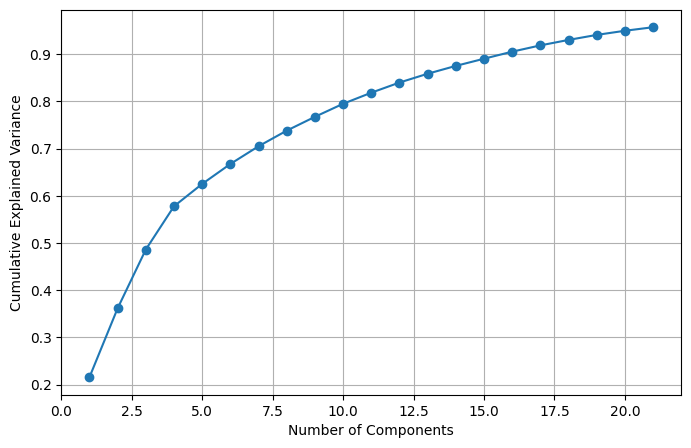

In [95]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

pca = PCA(n_components = 0.95) #variance = 95%


X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca)

X_pca_df.to_csv('X_pca.csv', index=False)

print(f'Original Features: {X_scaled.shape[1]}')
print(f'PCA Reduced Features: {X_pca.shape[1]}')

joblib.dump(pca, 'pca.pkl')

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [23]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Model
xgb_pca = XGBClassifier()
xgb_pca.fit(X_train, y_train)

# Predict
y_pred = xgb_pca.predict(X_test)

# Evaluate
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9998006335422989
[[19414     5]
 [    4 25720]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143



In [13]:
%pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00


In [23]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lgb = lgb.LGBMClassifier()

lgb.fit(X_train, y_train)

#lgb.predict(X_test)

y_pred_lgb = lgb.predict(X_test)

print(accuracy_score(y_test, y_pred_lgb))

# Metrics
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 102301, number of negative: 78267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 180568, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566551 -> initscore=0.267793
[LightGBM] [Info] Start training from score 0.267793


C:\Users\Tanya Batra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9997784817136655
[[19414     5]
 [    5 25719]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143



In [ ]:
%pip install catboost

In [25]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat = CatBoostClassifier(verbose=100, random_state=42)

cat.fit(X_train_pca, y_train)

y_pred_cat = cat.predict(X_test_pca)

# Metrics
print(accuracy_score(y_test, y_pred_cat))
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

ModuleNotFoundError: No module named 'catboost'

In [17]:
import joblib

model = joblib.load('models/cat_model.pkl')  # or 'cat_model.pkl'




In [66]:
"""def real_time_predict(data):
    prediction = model.predict(data)

    for i, pred in enumerate(prediction):
        if pred == 1:
            print(f"Row {i+1} → 🚨 ALERT: Attack Detected!")
        else:
            print(f"Row {i+1} → ✅ Safe Traffic.")

    return prediction"""



'def real_time_predict(data):\n    prediction = model.predict(data)\n\n    for i, pred in enumerate(prediction):\n        if pred == 1:\n            print(f"Row {i+1} → 🚨 ALERT: Attack Detected!")\n        else:\n            print(f"Row {i+1} → ✅ Safe Traffic.")\n\n    return prediction'

In [67]:
"""import pandas as pd

df = pd.read_csv('X_pca.csv')  

# Pick 5 random rows to simulate real-time traffic
real_time_samples = df.sample(5)

print(real_time_samples)"""



"import pandas as pd\n\ndf = pd.read_csv('X_pca.csv')  \n\n# Pick 5 random rows to simulate real-time traffic\nreal_time_samples = df.sample(5)\n\nprint(real_time_samples)"

In [68]:
#real_time_predict(real_time_samples)

In [131]:
#FINAL CODE FOR REAL TIME TRAFFIC ANALYSIS

#Real-Time Ideal Logic:
#→ Raw input → Preprocessing → PCA → Predict → Alert → Auto-Log

import pandas as pd
import pickle
import time
import os
# Load Models
scaler = joblib.load('models/scaler.pkl')
pca = joblib.load(open('models/pca.pkl', 'rb'))
model = joblib.load(open('models/cat_model.pkl', 'rb'))


def real_time_predict(raw_data):
    # Ensure correct features
    if raw_data.shape[1] > scaler.n_features_in_:
        raw_data = raw_data.iloc[:, :scaler.n_features_in_]

    # Preprocess
    processed = scaler.transform(raw_data.values)

    # PCA Transform
    pca_data = pca.transform(processed)

    # Predict
    prediction = model.predict(pca_data)

    for i, pred in enumerate(prediction):
        if pred == 1:
            print(f"Row {i+1} → 🚨 ALERT: Attack Detected!")
            with open("alerts_log.txt", "a") as f:
                f.write(f"ATTACK at {time.ctime()} \n\n")
        else:
            print(f"Row {i+1} → ✅ Safe Traffic.")

    time.sleep(5)

    raw_data['Prediction'] = prediction
    raw_data.to_csv('realtime_logs.csv', mode='a', index=False)
    
     
    return prediction
    



In [129]:
df = pd.read_csv('clean_cicids.csv')  # RAW UNTOUCHED DATA
sample = df.sample(25)
#print(sample)



In [130]:
real_time_predict(sample)

Row 1 → ✅ Safe Traffic.
Row 2 → ✅ Safe Traffic.
Row 3 → 🚨 ALERT: Attack Detected!
Row 4 → ✅ Safe Traffic.
Row 5 → 🚨 ALERT: Attack Detected!
Row 6 → 🚨 ALERT: Attack Detected!
Row 7 → ✅ Safe Traffic.
Row 8 → 🚨 ALERT: Attack Detected!
Row 9 → 🚨 ALERT: Attack Detected!
Row 10 → 🚨 ALERT: Attack Detected!
Row 11 → 🚨 ALERT: Attack Detected!
Row 12 → 🚨 ALERT: Attack Detected!
Row 13 → 🚨 ALERT: Attack Detected!
Row 14 → 🚨 ALERT: Attack Detected!
Row 15 → ✅ Safe Traffic.
Row 16 → ✅ Safe Traffic.
Row 17 → 🚨 ALERT: Attack Detected!
Row 18 → 🚨 ALERT: Attack Detected!
Row 19 → 🚨 ALERT: Attack Detected!
Row 20 → 🚨 ALERT: Attack Detected!
Row 21 → ✅ Safe Traffic.
Row 22 → 🚨 ALERT: Attack Detected!
Row 23 → ✅ Safe Traffic.
Row 24 → 🚨 ALERT: Attack Detected!
Row 25 → ✅ Safe Traffic.


array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)